In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow.keras.optimizers import Adam

# For LSTM model
from tensorflow import keras
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.layers import LSTM
#from keras.layers import Dropout
from tensorflow.keras import Sequential,layers,callbacks
from tensorflow.keras.layers import Dense,LSTM,Dropout,GRU,Bidirectional 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [57]:
df = pd.read_excel('datasett_len.xlsx')
df.head()

,Temp,Size,Time,Moisture
0,338,1.5,0,1.0000
1,338,1.5,1,0.9096
2,338,1.5,2,0.8316
3,338,1.5,3,0.7648
4,338,1.5,4,0.7080


In [58]:
df.shape

(3852, 4)

In [59]:
X = df
y = df.loc[:,['Moisture']]
X_test = X[3531:3852]
y_test = y[3531:3852]
X_train = X[0:3531]
y_train =y[0:3531]

X_train

,Temp,Size,Time,Moisture
0,338,1.5,0,1.0000
1,338,1.5,1,0.9096
2,338,1.5,2,0.8316
3,338,1.5,3,0.7648
4,338,1.5,4,0.7080
...,...,...,...,...
3526,368,3.0,316,0.0400
3527,368,3.0,317,0.0400
3528,368,3.0,318,0.0400
3529,368,3.0,319,0.0400


In [60]:
# Scale features
s1 = MinMaxScaler(feature_range =(-1, 1))
#Xs = s1.fit_transform(df[['Tair', 'RH', 'Vel', 'Size', 'Tsec', 'L', 'P', 'F', 'Tdrop']])
Xs = s1.fit_transform(X_train)
#Xs = s1.fit_transform(df(X)) alternative representation
#Scale predicted value
s2 = MinMaxScaler(feature_range=(-1, 1))
#Ys = s2.fit_transform(df[['Tdrop']])
Ys = s2.fit_transform(y_train)
#Ys = s2.fit_transform(df(y)) alternative representation
Xs.shape

(3531, 4)

In [61]:
winn1 = [['Hidden Layer','Time Step', 'Neuron', 'R2SCORETRAIN', 'R2SCORETEST', 'Training Time']]
predd = [['Hidden Layer','Time Step', 'Neuron', 'R2SCORETRAIN', 'R2SCOREPRED']]
winn1

[['Hidden Layer',
  'Time Step',
  'Neuron',
  'R2SCORETRAIN',
  'R2SCORETEST',
  'Training Time']]

In [62]:
data = [['Hidden Layer', 'Time Step', 'Neuron', 'Temp', 'Size', 'Time', 'Actual Mc', 'Predicted Mc', 'Next Prediction']]
data

[['Hidden Layer',
  'Time Step',
  'Neuron',
  'Temp',
  'Size',
  'Time',
  'Actual Mc',
  'Predicted Mc',
  'Next Prediction']]

In [63]:
Xval = X_test.values
Xval

array([[3.6800e+02, 4.5000e+00, 0.0000e+00, 1.0000e+00],
       [3.6800e+02, 4.5000e+00, 1.0000e+00, 9.8245e-01],
       [3.6800e+02, 4.5000e+00, 2.0000e+00, 9.6480e-01],
       ...,
       [3.6800e+02, 4.5000e+00, 3.1800e+02, 4.0000e-02],
       [3.6800e+02, 4.5000e+00, 3.1900e+02, 4.0000e-02],
       [3.6800e+02, 4.5000e+00, 3.2000e+02, 4.0000e-02]])

Epoch 1/1000
89/89 [==============================] - 3s 29ms/step - loss: 0.1997 - accuracy: 0.0000e+00 - val_loss: 0.0280 - val_accuracy: 0.0000e+00
Epoch 2/1000
89/89 [==============================] - 1s 13ms/step - loss: 0.0292 - accuracy: 0.0000e+00 - val_loss: 0.0211 - val_accuracy: 0.0000e+00
Epoch 3/1000
89/89 [==============================] - 1s 13ms/step - loss: 0.0257 - accuracy: 0.0000e+00 - val_loss: 0.0212 - val_accuracy: 0.0000e+00
Epoch 4/1000
89/89 [==============================] - 1s 13ms/step - loss: 0.0250 - accuracy: 0.0000e+00 - val_loss: 0.0187 - val_accuracy: 0.0000e+00
Epoch 5/1000
89/89 [==============================] - 1s 13ms/step - loss: 0.0242 - accuracy: 0.0000e+00 - val_loss: 0.0191 - val_accuracy: 0.0000e+00
Epoch 6/1000
89/89 [==============================] - 1s 13ms/step - loss: 0.0233 - accuracy: 0.0000e+00 - val_loss: 0.0170 - val_accuracy: 0.0000e+00
Epoch 7/1000
89/89 [==============================] - 1s 12ms/step - loss: 0.0225 - accuracy: 

89/89 [==============================] - 1s 12ms/step - loss: 0.0142 - accuracy: 0.0000e+00 - val_loss: 0.0111 - val_accuracy: 0.0000e+00
Epoch 55/1000
89/89 [==============================] - ETA: 0s - loss: 0.0143 - accuracy: 0.0000e+ - 1s 13ms/step - loss: 0.0140 - accuracy: 0.0000e+00 - val_loss: 0.0113 - val_accuracy: 0.0000e+00
Epoch 56/1000
89/89 [==============================] - 1s 13ms/step - loss: 0.0136 - accuracy: 0.0000e+00 - val_loss: 0.0114 - val_accuracy: 0.0000e+00
Epoch 57/1000
89/89 [==============================] - 1s 13ms/step - loss: 0.0134 - accuracy: 0.0000e+00 - val_loss: 0.0115 - val_accuracy: 0.0000e+00
Epoch 58/1000
89/89 [==============================] - ETA: 0s - loss: 0.0137 - accuracy: 0.0000e+ - 1s 13ms/step - loss: 0.0135 - accuracy: 0.0000e+00 - val_loss: 0.0109 - val_accuracy: 0.0000e+00
Epoch 59/1000
89/89 [==============================] - 1s 13ms/step - loss: 0.0131 - accuracy: 0.0000e+00 - val_loss: 0.0109 - val_accuracy: 0.0000e+00
Epoch 60/1

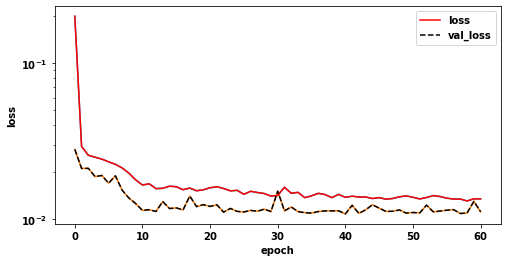

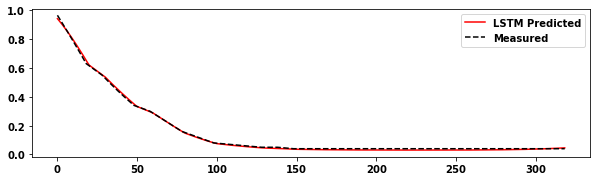

The R2 score of the Training set is :	0.9277
The R2 score of the Testing set is :	0.9988
2 70 0.9277284480611843
2 70 0.9988257427636408


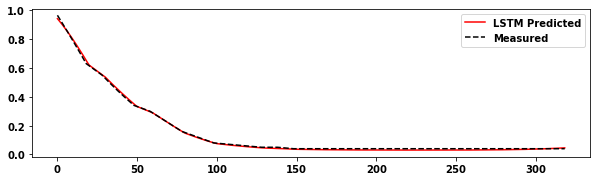

The R2 score of the Training set of  predicted values to predict is :	0.9277
The R2 score of the Testing set predicted values to predict is :	0.9939


In [64]:
seed = 333
import os
import random as rn
import numpy as np
import tensorflow as tf

os.environ['PYTHONHASHSEED']=str(seed)
rn.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

for window in range(2,3):
    X = []
    Y = []
    for i in range(window,len(Xs)):
        X.append(Xs[i-window:i,:])
        Y.append(Ys[i])
# Reshape data to format accepted by LSTM
    X, Y = np.array(X), np.array(Y)
    
    #LSTM model
    for j in range (70,71):
        model = Sequential()
        model.add(LSTM(units=j, return_sequences=True, \
                input_shape=(X.shape[1],X.shape[2])))
        model.add(Dropout(0.2))
        model.add(LSTM(units=j, return_sequences=True))
        model.add(Dropout(0.2))
        model.add(LSTM(units=j, return_sequences=True))
        model.add(Dropout(0.2))
        model.add(LSTM(units=j))
        model.add(Dropout(0.2))
        model.add(Dense(units=1))

        #compile model
        #model.compile(Adam(lr=0.003), 'mean_squared_error')
        model.compile(optimizer = 'adam', loss = 'mean_squared_error',\
                        metrics = ['accuracy'])
        # Allow for early exit
        es = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=20)

        # Fit (and time) LSTM model
        t0 = time.time()
        #history = model.fit(X, Y, epochs=500, validation_split=0.1, verbose=0)
        history = model.fit(X, Y, epochs = 1000, batch_size = 32, callbacks=[es], verbose=1,validation_split=0.2)
        t1 = time.time()
        timeit = t1-t0
        print('Runtime: %.2f s' %(timeit))

        # Plot loss
        plt.figure(figsize=(8,4))
        plt.semilogy(history.history['loss'])
        plt.semilogy(history.history['val_loss'])
        plt.plot(history.history['loss'],'r-',label='loss')
        plt.plot(history.history['val_loss'],'k--',label='val_loss')
        plt.legend()
        plt.xlabel('epoch'); plt.ylabel('loss')
        plt.savefig('Loss.png')
        model.save('model.h5')
        plt.show()

        # Verify the fit of the model
        Yp = model.predict(X)
        Yp = Yp.reshape((Yp.shape[0],Yp.shape[1]))

        # un-scale outputs
        Yu = s2.inverse_transform(Yp)
        Ym = s2.inverse_transform(Y)



        Xts = s1.transform(X_test)
        Yts = s2.transform(y_test)

        Xti = []
        Yti = []
        for i in range(window,len(Xts)):
            Xti.append(Xts[i-window:i,:])
            Yti.append(Yts[i])

        # Reshape data to format accepted by LSTM
        Xti, Yti = np.array(Xti), np.array(Yti)

        # Verify the fit of the model
        Ytp = model.predict(Xti)

        # un-scale outputs
        Ytu = s2.inverse_transform(Ytp)
        Ytm = s2.inverse_transform(Yti)

        plt.figure(figsize=(10,6))
        plt.subplot(2,1,1)
        plt.plot(Ytu,'r-',label='LSTM Predicted')
        plt.plot(Ytm,'k--',label='Measured')
        plt.legend()
        plt.show()

        print('The R2 score of the Training set is :\t{:0.4f}'.format(r2_score(Ym, Yu)))
        print('The R2 score of the Testing set is :\t{:0.4f}'.format(r2_score(Ytm, Ytu)))
        R2SCORETRAIN = r2_score(Ym,Yu)
        R2SCORETEST = r2_score(Ytm, Ytu)
        print(window,j,R2SCORETRAIN)
        print(window, j,R2SCORETEST)
        
        winn1.append(['3',window,j,R2SCORETRAIN,R2SCORETEST,timeit])
            

        # Using predicted values to predict next step
        Xtsq = Xts.copy()
        for i in range(window,len(Xtsq)):
            Xin = Xtsq[i-window:i].reshape((1, window, 4))
            Xtsq[i][0] = model.predict(Xin)
            Yti[i-window] = Xtsq[i][0]

        Ytn = (Yti - s2.min_[0])/s2.scale_[0]
        Ytn = s2.inverse_transform(Yti)

        #Plots
        plt.figure(figsize=(10,6))
        plt.subplot(2,1,1)
        plt.plot(Ytu,'r-',label='LSTM Predicted')
        plt.plot(Ytm,'k--',label='Measured')
        plt.legend()
        plt.show()

        # calculates and print r_2 score of training and testing
        print('The R2 score of the Training set of  predicted values to predict is :\t{:0.4f}'.format(r2_score(Ym, Yu)))
        print('The R2 score of the Testing set predicted values to predict is :\t{:0.4f}'.format(r2_score(Ytm, Ytn)))
        R2SCOREPRED = r2_score(Ytm, Ytn)
        predd.append(['3',window,j,R2SCORETRAIN,R2SCOREPRED])
        for i in range(0,len(Ytm)):
            data.append(['3',window,j,Xval[i+window,0],Xval[i+window,1],Xval[i+window,2],Ytm[i][0],Ytu[i][0],Ytn[i][0]])
#         for i in range(0,len(Ytm)):
#             while i < 20:
#                 data.append([window,j,Ytm[i][0],Ytu[i][0],Ytn[i][0]])
#                 break


## For Train-Test Evaluation Score Pick

In [65]:
colns = winn1.pop(0)

df_cheeck = pd.DataFrame(winn1, columns=colns)
df_cheeck

,Hidden Layer,Time Step,Neuron,R2SCORETRAIN,R2SCORETEST,Training Time
0,3,2,70,0.927728,0.998826,78.39563


In [ ]:
df_cheeck.to_excel("Optimizing neuron48 and timestep2 unsorted relup10(Test).xlsx")

In [37]:
df_cheeck.sort_values(['R2SCORETEST'],ascending=[False])

,Hidden Layer,Time Step,Neuron,R2SCORETRAIN,R2SCORETEST,Training Time
0,3,2,70,0.926637,0.994078,44.478607


In [ ]:
df_sortt = df_cheeck.sort_values(['R2SCORETEST'],ascending=[False])

In [ ]:
df_sortt.to_excel("Optimizing neuron48 and timestep2 relup10(Test).xlsx")

## Dataset Evaluation

In [66]:
clm = data.pop(0)

dat = pd.DataFrame(data, columns=clm)
dat

,Hidden Layer,Time Step,Neuron,Temp,Size,Time,Actual Mc,Predicted Mc,Next Prediction
0,3,2,70,368.0,4.5,2.0,0.96480,0.941724,0.941724
1,3,2,70,368.0,4.5,3.0,0.94705,0.928375,0.929285
2,3,2,70,368.0,4.5,4.0,0.92920,0.914651,0.918406
3,3,2,70,368.0,4.5,5.0,0.91125,0.900557,0.904953
4,3,2,70,368.0,4.5,6.0,0.89320,0.886102,0.891065
...,...,...,...,...,...,...,...,...,...
314,3,2,70,368.0,4.5,316.0,0.04000,0.043584,0.055405
315,3,2,70,368.0,4.5,317.0,0.04000,0.044132,0.055982
316,3,2,70,368.0,4.5,318.0,0.04000,0.044698,0.056574
317,3,2,70,368.0,4.5,319.0,0.04000,0.045282,0.057180


In [ ]:
dat.to_excel("##Dataset neuron70 3hls and timestep2 relup10.xlsx")

## For Train-Predict Evaluation Score Pick

In [ ]:
cols = predd.pop(0)

df_cheeck2 = pd.DataFrame(predd, columns=cols)
df_cheeck2

In [ ]:
df_cheeck2.to_excel("Optimizing neuron48 and timestep2 unsorted relup10(Pred).xlsx")

In [ ]:
df_predd = df_cheeck2.sort_values(['R2SCOREPRED'],ascending=[False])
df_predd

In [ ]:
df_predd.to_excel("Optimizing neuron48 and timestep2 relup10(Pred).xlsx")